# Exploratory Data Analysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv', parse_dates=['date'])
events = pd.read_csv('calendar_events.csv', parse_dates=['date'])

#PREPROCESS
#Extract store name
def parse_store_name(df):
    # Use Unicode en dash '–' (U+2013), surrounded by spaces as seen in data
    split_cols = df['store_name'].str.split(' – ', n=1, expand=True)

    # Ensure there are always 2 columns
    if split_cols.shape[1] == 1:
        split_cols[1] = None  # add a second column if needed

    # Replace missing values with 'All Stores'
    split_cols = split_cols.fillna('All Stores')

    # Rename and assign
    split_cols.columns = ['country', 'store']
    df[['country', 'store']] = split_cols

    return df

def merge_events(df, events):
    df = df.merge(events, on='date', how='left')
    return df


df = parse_store_name(df)
df = merge_events(df, events)

df.head()

,store_id,store_name,date,revenue,country,store,event
0,0,All Stores,2011-01-29,204126.52,All Stores,All Stores,NaN
1,0,All Stores,2011-01-30,197426.42,All Stores,All Stores,NaN
2,0,All Stores,2011-01-31,144267.27,All Stores,All Stores,NaN
3,0,All Stores,2011-02-01,151903.00,All Stores,All Stores,NaN
4,0,All Stores,2011-02-02,117399.88,All Stores,All Stores,NaN


In [33]:
df.describe(include='all')

,store_id,store_name,date,revenue,country,store,event
count,18766.000000,18766,18766,18766.000000,18766,18766,1507
unique,NaN,11,NaN,NaN,4,11,34
top,NaN,All Stores,NaN,NaN,California,All Stores,SuperBowl
freq,NaN,1706,NaN,NaN,6824,1706,55
mean,5.000000,NaN,2013-05-30 12:00:00,43101.355174,NaN,NaN,NaN
min,0.000000,NaN,2011-01-29 00:00:00,0.000000,NaN,NaN,NaN
25%,2.000000,NaN,2012-03-30 00:00:00,17746.470000,NaN,NaN,NaN
50%,5.000000,NaN,2013-05-30 12:00:00,23064.675000,NaN,NaN,NaN
75%,8.000000,NaN,2014-07-31 00:00:00,31238.132500,NaN,NaN,NaN
max,10.000000,NaN,2015-09-30 00:00:00,394304.000000,NaN,NaN,NaN


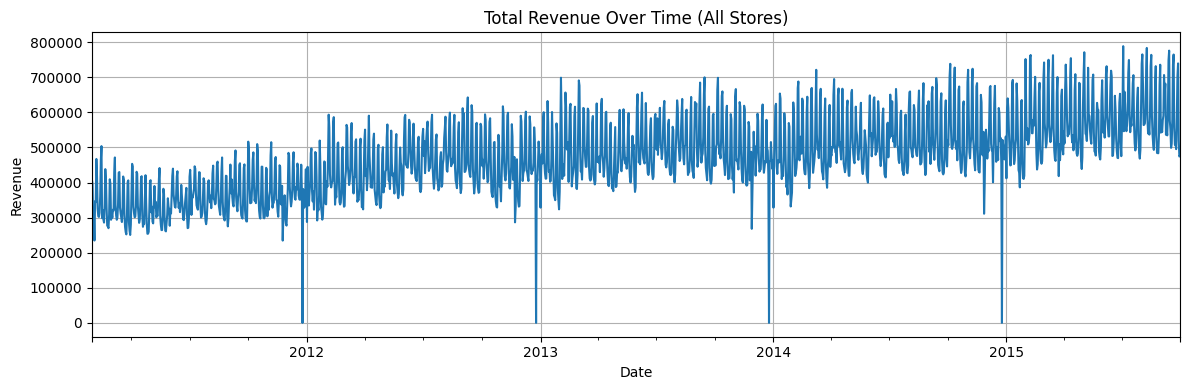

In [23]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df_all = df.groupby('date')['revenue'].sum()

plt.figure(figsize=(12, 4))
df_all.plot(title='Total Revenue Over Time (All Stores)')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

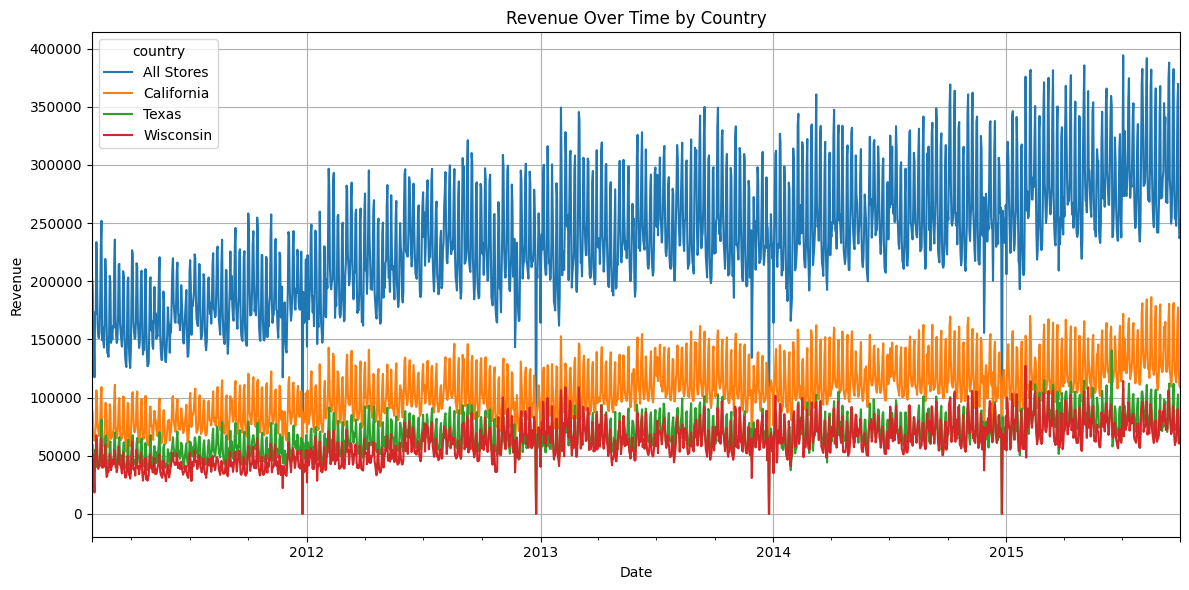

In [24]:
df_country = df.groupby(['date', 'country'])['revenue'].sum().unstack()

df_country.plot(figsize=(12, 6), title='Revenue Over Time by Country')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

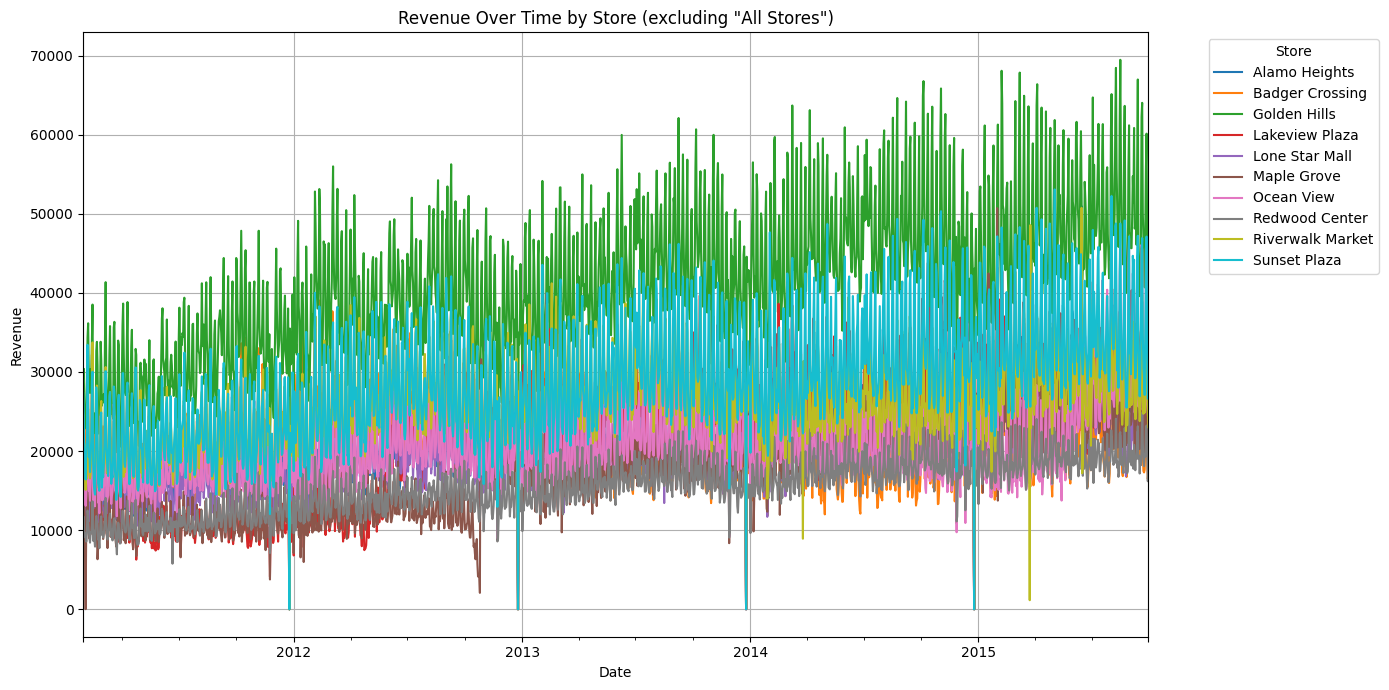

In [26]:
# Filter out "All Stores" label
df_filtered = df[df['store'] != 'All Stores']

# Group by date and store, then pivot for plotting
df_store = df_filtered.groupby(['date', 'store'])['revenue'].sum().unstack()

# Plot all stores (excluding "All Stores")
plt.figure(figsize=(14, 7))
df_store.plot(title='Revenue Over Time by Store (excluding "All Stores")', figsize=(14, 7))
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Compare Revenue on Event vs. Non-Event Days 

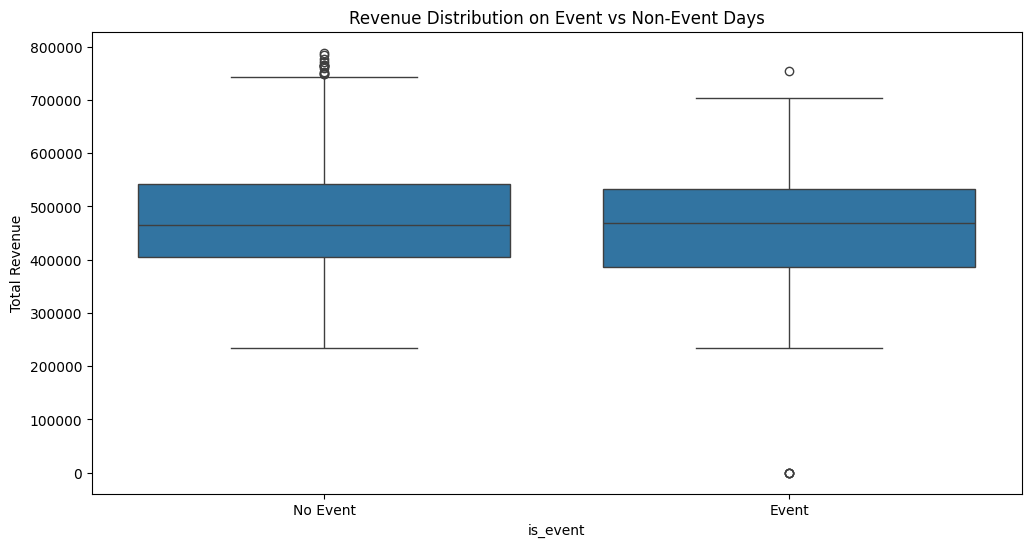

In [34]:
import seaborn as sns

df['is_event'] = df['event'].notna()

# Aggregate total revenue per day
daily_revenue = df.groupby(['date', 'is_event'])['revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_revenue, x='is_event', y='revenue')
plt.title("Revenue Distribution on Event vs Non-Event Days")
plt.xticks([0, 1], ['No Event', 'Event'])
plt.ylabel("Total Revenue")
plt.show()

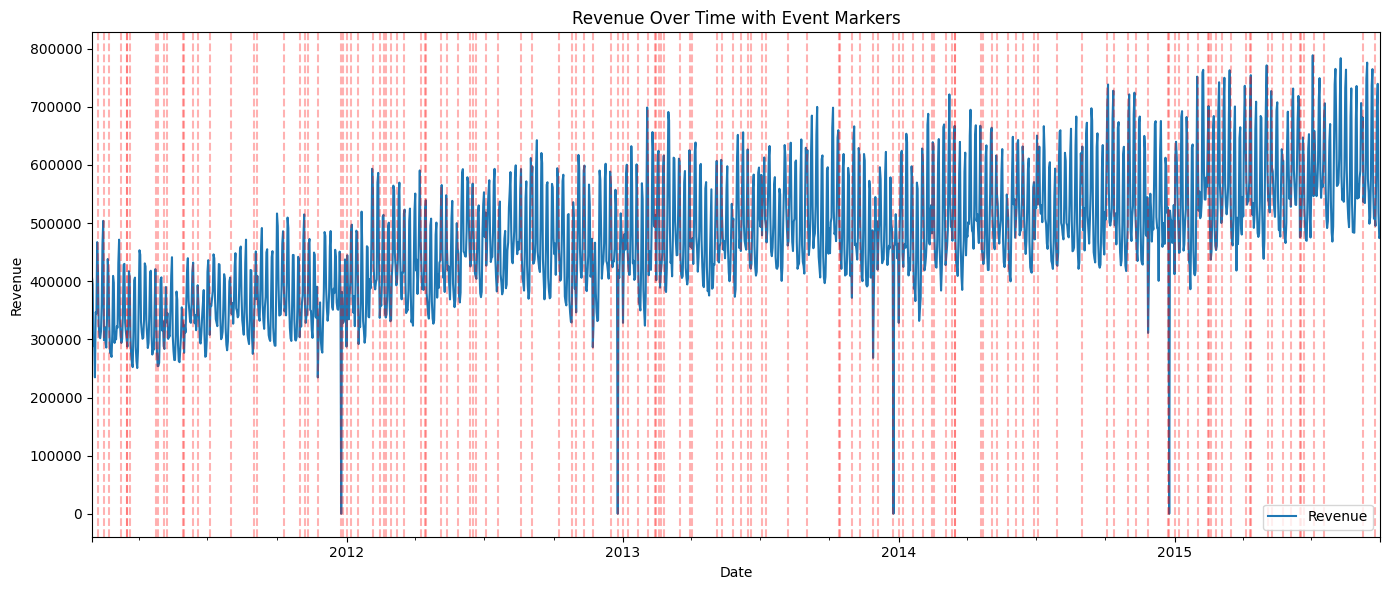

In [36]:
revenue_by_day = df.groupby('date')['revenue'].sum()

# Plot
plt.figure(figsize=(14, 6))
revenue_by_day.plot(label='Revenue')
plt.title("Revenue Over Time with Event Markers")
plt.xlabel("Date")
plt.ylabel("Revenue")

# Mark events on the plot
event_dates = events['date']
for d in event_dates:
    plt.axvline(d, color='red', linestyle='--', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()